In [1]:
# Libraries:
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..'))) # include parent directory in the path
from data import SINDy_data
from data import data
from data import equations

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.
from toolbox.auxiliary_functions import set_param_freq
from toolbox.symbolic_SINDy import symbolic_SINDy

# Seed:
np.random.seed(999)

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


#### Case $k$ varying and $n$, $k_a$, $k_y$ fixed
Consider the modified Van der Pol system with a nonlinear forcing term
$$
\begin{cases}
\dot{x} = \frac{k y^n}{k_a + y^n} \\
\dot{y} = - k_y y
\end{cases}
$$
and with $n=2.8$, $k_a=4$ and $k_y=0.1$ fixed, and $k \in [1,2]$

In [2]:
# Select ODE & settings:
ode_name = 'HillODE_par_k' # help="name of the ode", type=str
ode_param = '2.8,4,0.1' # help="parameters of the ode (default: None)", type=str, default=None
freq = 10 # help="sampling frequency", type=float, default=10
freq_SR = 10
n_sample = 50 # help="number of trajectories", type=int, default=100
noise_ratio = 0.01 # help="noise level (default 0)", type=float, default=0.
seed = 100 # help="random seed", type=int, default=0
n_seed = 1 # help="random seed", type=int, default=10

ode_param, freq = set_param_freq(ode_param, freq)

ode = equations.get_ode(ode_name, ode_param)
dt = 1 / freq
dim_x = 2
dim_k = 1
time_vector = np.arange(0, ode.T + dt, dt)
T = ode.T

In [ ]:
# # Generate data:
# X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k)
# print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
# print(feature_names)

# # Save data:
# file_path = 'saved/data/hillODE_par_k_data.pkl'
# os.makedirs(os.path.dirname(file_path), exist_ok=True)
# with open(file_path, 'wb') as f:
#     dill.dump((X_list, dX_list, param_list, feature_names), f)

In [3]:
# Uploda data:
file_path = 'saved/data/hillODE_par_k_data.pkl'
with open(file_path, 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

(50, 150, 2) (50, 150, 2) (50, 150)
['X0', 'X1', 'X2']


In [4]:
# Symbolic-SINDy call and fit
model = symbolic_SINDy(SR_method='SR-T', 
                       x_id=0,
                       degree=2,
                       threshold=0.05,
                       product=True)
final_model, building_blocks_lambda, _, _, _, _ =  model.call_param(X_list=X_list, dX_list=dX_list, param_list=param_list,
           feature_names=feature_names, dt=dt, building_blocks_lambda=None, 
           function_names=None, patience=0, lazy=False, ode=ode, ode_name=ode_name,
           ode_param=ode_param, freq_SR=freq_SR, n_sample=n_sample, 
           noise_ratio=noise_ratio, seed=seed, n_seed=n_seed, 
           T0=0, T=T, dim_x=dim_x, dim_k=dim_k)


Searching for additonal building blocks -> SR-T call:

Running with: ode_name=HillODE_par_k, ode_param=[2.8, 4.0, 0.1], x_id=0, freq=10, n_sample=50, noise_sigma=0.01, alg=tv, seed=100, n_seed=1
Dataset shape:  (151, 50, 3)
Functions set:  {'neg': 1, 'mul': 1, 'pow': 1, 'add': 1, 'div': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.70       1.6165e+10        7         0.267277         0.252269      3.88m


/home/mattg/gplearn/gplearn/functions.py:132: RuntimeWarning: overflow encountered in power
  return np.where(np.logical_and(np.minimum(x1, x2) >= 0, np.maximum(x1, x2) <= 10), np.power(x1, x2), 1000)
/home/mattg/gplearn/gplearn/functions.py:132: RuntimeWarning: overflow encountered in power
  return np.where(np.logical_and(np.minimum(x1, x2) >= 0, np.maximum(x1, x2) <= 10), np.power(x1, x2), 1000)


   1     6.32          12963.3        7         0.263252         0.288492      4.63m
   2     3.44            80015        9         0.179696         0.182597      3.09m
   3     3.38          22714.9       11         0.152943         0.137869      3.08m
   4     5.03          19782.5        9          0.14695         0.159908      3.28m
   5     6.01           6043.3       13        0.0328813        0.0344175      2.71m
   6     7.50          19453.9       13        0.0329476         0.033821      2.74m
   7     8.27            14924       13        0.0327492        0.0356063      2.54m
   8     8.40          23354.4       17        0.0285659        0.0286011      2.07m
   9     9.60          10293.5       23        0.0200052        0.0207383      2.11m
  10    10.18          4528.73       17        0.0179213         0.017967      1.71m
  11    11.08           7184.8       13        0.0138144         0.013632      1.69m
  12    11.16          1894.69       13        0.0137906         

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.412 1 + -4.184 X1 + -0.307 X2 + -1.312 X1^2 + 1.235 X1 X2 + 4.494 X1**1.2336359195119782 + 0.564 X1 X1**1.2336359195119782 + -0.666 X2 X1**1.2336359195119782
(X1)' = -0.100 X1
Model:
(X0)' = -0.387 1 + -0.248 X1 + 0.362 X2 + 0.158 X1 X2 + 0.122 (X1 + X2)/X2 + 0.114 X2 (X1 + X2)/X2
(X1)' = -0.100 X1
Model:
(X0)' = 0.301 1 + -2.205 X1 + -0.251 X2 + -0.975 X1^2 + 0.837 X1 X2 + 2.601 X1**1.36853009504777 + 0.254 X1 X1**1.36853009504777 + -0.322 X2 X1**1.36853009504777
(X1)' = -0.100 X1
Model:
(X0)' = 2.032 1 + 0.128 X1 + -0.288 X2 + -0.811 3.1428095654476746*X2/X1 + -0.905 X1 3.1428095654476746*X2/X1 + 1.255 X2 3.1428095654476746*X2/X1 + 0.478 X1 X2 3.1428095654476746*X2/X1 + -0.490 X2^2 3.1428095654476746*X2/X1
(X1)' = -0.100 X1
Model:
(X0)' = 0.317 X1 X2 + 0.101 X2 0.31818663497594259*X1 + -0.091 X1 X2 0.31818663497594259*X1
(X1)' = -0.100 X1
Model:
(X0)' = -10.473 1 + -0.155 X0 + -1.464 X1 + 69.671 X2 + 0.288 X0 X2 + 2.718 X1 X2 + 188.062 X2^2 + -2.553 X2**1.77341757796

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.577 X2^2 + -1.717 3.6453043768931366/X1 + 2.717 X2 3.6453043768931366/X1 + -1.085 X2^2 3.6453043768931366/X1
(X1)' = 0.000
Model:
(X0)' = 0.323 X1 X2 + 0.091 X2 0.2829579047359203*X1 + -0.103 X1 X2 0.2829579047359203*X1
(X1)' = -0.100 X1


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.577 X2^2 + -1.599 3.912458527029813/X1 + 2.532 X2 3.912458527029813/X1 + -1.011 X2^2 3.912458527029813/X1
(X1)' = 0.000
Model:
(X0)' = -1.527 X2 + 0.105 X1 X2 + 0.716 X2^2 + -0.646 3.912458527029813/X1**2 + 0.998 X2 3.912458527029813/X1**2 + 0.313 X1^2 3.912458527029813/X1**2 + -0.385 X2^2 3.912458527029813/X1**2
(X1)' = -0.100 X1
Model:
(X0)' = -1.527 X2 + 0.105 X1 X2 + 0.716 X2^2 + -0.693 3.6453043768931366/X1**2 + 1.072 X2 3.6453043768931366/X1**2 + 0.336 X1^2 3.6453043768931366/X1**2 + -0.413 X2^2 3.6453043768931366/X1**2
(X1)' = -0.100 X1


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.500 X2^2 + -1.559 2.118980109148033/X1 + 2.482 X2 2.118980109148033/X1 + 0.063 X1^2 2.118980109148033/X1 + -0.118 X1 X2 2.118980109148033/X1 + -0.997 X2^2 2.118980109148033/X1
(X1)' = 0.000
Model:
(X0)' = -1.527 X2 + 0.105 X1 X2 + 0.716 X2^2 + -0.636 3.975218442267394/X1**2 + 0.983 X2 3.975218442267394/X1**2 + 0.308 X1^2 3.975218442267394/X1**2 + -0.379 X2^2 3.975218442267394/X1**2
(X1)' = -0.100 X1


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.577 X2^2 + -1.574 3.975218442267394/X1 + 2.492 X2 3.975218442267394/X1 + -0.995 X2^2 3.975218442267394/X1
(X1)' = 0.000
Model:
(X0)' = -4.969 1 + -0.466 X1 + 1.005 X2 + 0.100 X2^2 + -0.213 3.017072313770654*X1**(-1.6072085266264717) + 0.631 X1 3.017072313770654*X1**(-1.6072085266264717) + 0.305 X2 3.017072313770654*X1**(-1.6072085266264717) + 1.210 X1^2 3.017072313770654*X1**(-1.6072085266264717) + -0.318 X1 X2 3.017072313770654*X1**(-1.6072085266264717) + -0.111 X2^2 3.017072313770654*X1**(-1.6072085266264717)
(X1)' = -0.100 X1
Model:
(X0)' = 0.146 1 + -0.905 X1 + -0.174 X2 + -0.852 X1^2 + 0.564 X1 X2 + 1.505 X1**1.6072085266264717 + 0.085 X1 X1**1.6072085266264717 + -0.122 X2 X1**1.6072085266264717
(X1)' = -0.100 X1
Model:
(X0)' = 0.977 X1*X2/(X1 + 3.9818075950217824/X1**2)
(X1)' = -0.100 X1
errors:  [23.015651496020315, 0.1743217144193954, 3.445874669067576, 0.13763930273572825, 51.92684730978875, 0.4989991953725641, 1000, 1000, 57.10013465592124, 0.4990808499535121

##### Plot per report

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def evaluate_traj(model, ode, freq, n_sample, init_high, init_low,
                  dim_x=1, dim_k=1, title=None, T_aux=100):

    np.random.seed(666)
    dt = 1 / freq
    time_vector = np.arange(0, T_aux, dt)
    t = np.arange(0, T_aux, dt)
    T_plot = len(t)

    # true trajectories:
    dg_true = data.DataGenerator(ode, T_aux, freq, n_sample,
                                 noise_sigma=0., init_high=init_high, init_low=init_low)
    xt_true = dg_true.xt

    # estimated trajectories:
    pred_0_list = []
    for i in range(n_sample):
        correct_param = xt_true[0, i, -dim_k:]
        t = np.arange(0, T_aux, dt)
        T_plot = len(t)
        test_params = np.tile(correct_param, (T_plot, 1))
        if dim_k != 0:
            pred_0 = model.simulate(xt_true[0, i, :][:-dim_k], t=t[:T_plot], u=test_params)
        else:
            pred_0 = model.simulate(xt_true[0, i, :], t=t[:T_plot])
        pred_0_list.append(pred_0)

    # reshape
    xt_true = xt_true[:len(pred_0), :, :]
    time_vector = time_vector[:len(pred_0)]
    if dim_k != 0:
        xt_true = xt_true[:, :, :-dim_k]
    xt_true = xt_true.squeeze()
    pred_0_list = np.transpose(pred_0_list, (1, 0, 2)).squeeze()

    # ------------ PLOTTING ------------
    if n_sample == 1:

        # -------- dim_x = 1 ----------
        if dim_x == 1:
            fig, ax = plt.subplots(1, 1, figsize=(5, 4))
            ax.plot(time_vector, pred_0_list, color='blue', linewidth=1.0,
                    alpha=0.7, label=r'Estimated Trajectory')
            ax.plot(time_vector, xt_true, color='red', linewidth=1.0,
                    linestyle='--', label=r'Correct Trajectory')
            ax.scatter(time_vector[0], xt_true[0], color='green', label=r'Start')
            ax.scatter(time_vector[-1], xt_true[-1], color='red', label=r'End')
            ax.set_xlabel(r'$t$')
            ax.set_ylabel(r'$x$')
            if title:
                ax.set_title(r'%s' % title)
            ax.legend(fontsize=9, loc='lower right')
            ax.grid(True)

        # -------- dim_x = 2 (RISCRITTO) ----------
        elif dim_x == 2:

            fig, axes = plt.subplots(2, 1, figsize=(5, 6), sharex=True)

            # ----- PLOT x(t) -----
            axes[0].plot(time_vector, pred_0_list[:, 0], color='blue',
                        linewidth=1.0, alpha=0.7, label=r'Estimated $x(t)$')
            axes[0].plot(time_vector, xt_true[:, 0], color='red',
                        linewidth=1.0, linestyle='--', label=r'Correct $x(t)$')

            # Start & End sulla traiettoria vera
            axes[0].scatter(time_vector[0], xt_true[0, 0], color='green', label='Start')
            axes[0].scatter(time_vector[-1], xt_true[-1, 0], color='red', label='End')

            axes[0].set_ylabel(r'$x(t)$')
            axes[0].legend(fontsize=9)
            axes[0].grid(True)

            # ----- PLOT y(t) -----
            axes[1].plot(time_vector, pred_0_list[:, 1], color='blue',
                        linewidth=1.0, alpha=0.7, label=r'Estimated $y(t)$')
            axes[1].plot(time_vector, xt_true[:, 1], color='red',
                        linewidth=1.0, linestyle='--', label=r'Correct $y(t)$')

            # Start & End sulla traiettoria vera
            axes[1].scatter(time_vector[0], xt_true[0, 1], color='green', label='Start')
            axes[1].scatter(time_vector[-1], xt_true[-1, 1], color='red', label='End')

            axes[1].set_xlabel(r'$t$')
            axes[1].set_ylabel(r'$y(t)$')
            axes[1].legend(fontsize=9)
            axes[1].grid(True)

            if title:
                fig.suptitle(r'%s' % title)

            fig.tight_layout()


        # -------- dim_x = 3 ----------
        else:
            fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': '3d'})
            ax.plot(pred_0_list[:, 0], pred_0_list[:, 1], pred_0_list[:, 2],
                    color='blue', linewidth=1.0, alpha=0.7, label=r'Estimated Trajectory')
            ax.plot(xt_true[:, 0], xt_true[:, 1], xt_true[:, 2],
                    color='red', linewidth=1.0, linestyle='--', label=r'Correct Trajectory')
            ax.scatter(xt_true[:, 0][0], xt_true[:, 1][0], xt_true[:, 2][0], color='green', label=r'Start')
            ax.scatter(xt_true[:, 0][-1], xt_true[:, 1][-1], xt_true[:, 2][-1], color='red', label=r'End')
            ax.set_xlabel(r'$x$')
            ax.set_ylabel(r'$y$')
            ax.set_zlabel(r'$z$')
            if title:
                ax.set_title(r'%s' % title)
            ax.legend(fontsize=9, loc='lower right')
            ax.grid(True)


Best SINDy Model RMSE:  0.03633272078034747


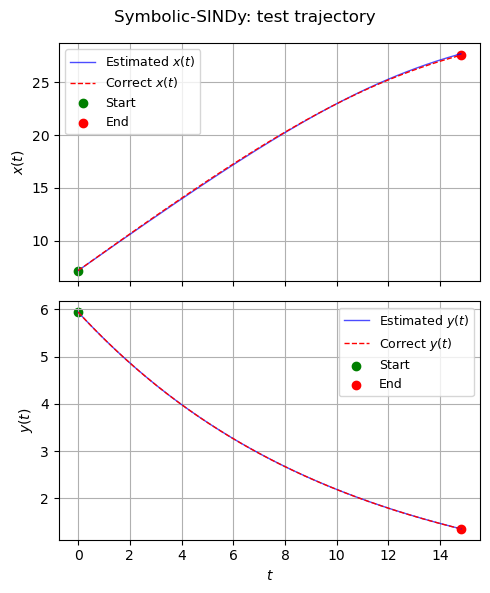

In [6]:
n_test = 10
rmse, _ = SINDy_data.evaluate_RMSE(final_model, ode, freq, n_test, [10., 10., 2.], [0., 0., 1.], dim_k)
print('Best SINDy Model RMSE: ', rmse)

evaluate_sample = 1
ics = [7., 6., 1.8]
title = 'Symbolic-SINDy: test trajectory'
evaluate_traj(final_model, ode, freq, evaluate_sample, ics, ics, dim_x, dim_k, title=title, T_aux=15)

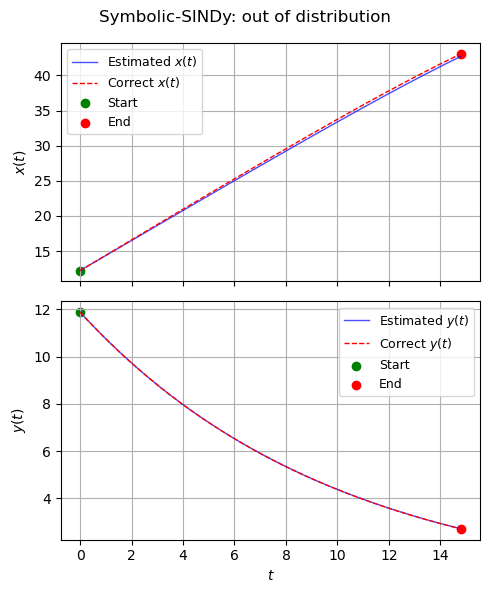

In [7]:
evaluate_sample = 1
ics = [12, 12, 2.2]
title = 'Symbolic-SINDy: out of distribution'
evaluate_traj(final_model, ode, freq, evaluate_sample, ics, ics, dim_x, dim_k, title=title, T_aux=15)

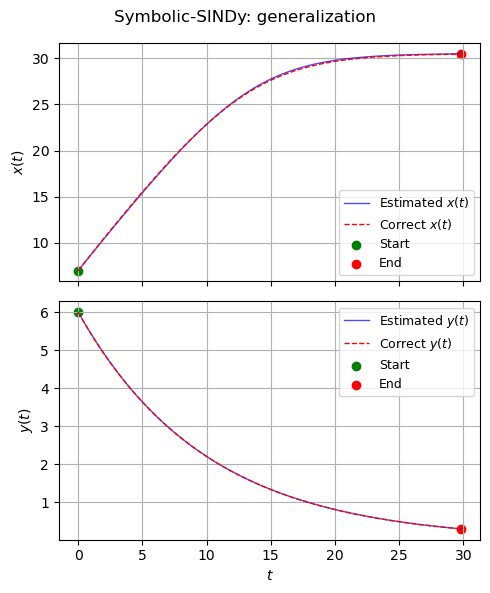

In [8]:
evaluate_sample = 1
ics = [7, 6, 1.8]
title = 'Symbolic-SINDy: generalization'
evaluate_traj(final_model, ode, freq, evaluate_sample, ics, ics, dim_x, dim_k, title=title, T_aux=30)